# Pandas intro class 04

Objective:
- Understand and learn Exploratory Data Analysis (EDA)
- Data visulization 101


## EDA recommended steps

Data inspection - Data cleaning - Data wrangling - Data visualization

- inspect all datasets and metadata definition
- understand data types
- understand/ask the right question
- check for missing values, take appropriate action
- check for duplicates, take appropriate action
- check data distribution (outliers, anormaly values, check assumption, etc.)
- check correlation (with target variable, or multicolinearity in inputs)
- take care of outliers and generate transformations if needed
- data wrangling for your problem
- feature engineering
- visualization (along the way of all steps above)
#### Advanced topics:
- sampling: random, up-sample, down-sample
- bi-variate / multi-variate views
- time series

## Data visulization 101

Tools:
- `matplotlib`: https://matplotlib.org/gallery/index.html
- `seaborn`: https://seaborn.pydata.org/
- `pandas` also have lots of built-in methods: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization
- `plotly`: https://plotly.com/python/getting-started/?utm_source=mailchimp-jan-2015&utm_medium=email&utm_campaign=generalemail-jan2015&utm_term=bubble-chart

In [ ]:
# install packages required in this class in your virtual env
! conda install matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

%matplotlib inline

## Recommended resourse: [Data EDA cheat-sheet](https://github.com/cmawer/pycon-2017-eda-tutorial/blob/master/EDA-cheat-sheet.md)

### Another cheat-sheet in image format:
![img](https://www.analyticsvidhya.com/wp-content/uploads/2015/06/infographics-final.jpg)

## EDA example: World Happiness Data
https://www.kaggle.com/unsdsn/world-happiness

- Relatively smalle dataset for exploration
- Easy to explore with lots of flexibility
- Dystopis: https://worldhappiness.report/faq/#what-is-dystopia

In [75]:
rename_dict = {'Overall rank':'Rank',
               'Happiness Rank':'Rank',
               'Happiness.Rank':'Rank',
               'Happiness Score':'Score',
               'Happiness.Score':'Score',
               'Country or region':'Country',
               'Economy..GDP.per.Capita.':'GDP_PC',
               'GDP per capita':'GDP_PC',
               'Economy (GDP per Capita)':'GDP_PC',
               'Social support':'Family',
               'Health (Life Expectancy)':'Health',
               'Healthy life expectancy':'Health',
               'Health..Life.Expectancy.':'Health',
               'Freedom to make life choices':'Freedom',
               'Trust (Government Corruption)':'Trust',
               'Trust..Government.Corruption.':'Trust',
               'Perceptions of corruption':'Trust',
               'Dystopia Residual':'Dystopia',
               'Dystopia.Residual':'Dystopia'
              }

In [76]:
# read in all different years of data
df_list = []

for year in range(2015, 2020):
    df = pd.read_csv(f'data/world-happiness/{year}.csv')
    # comment the following two lines for metadata inspection
    df.rename(columns=rename_dict, inplace=True)
    df['year'] = int(year)
    df_list.append(df)

In [77]:
df_all = pd.concat(df_list)
df_all.sort_values(['Country','year'], inplace=True)
df_all.groupby('year')['Country'].count()

year
2015    158
2016    157
2017    155
2018    156
2019    156
Name: Country, dtype: int64

In [268]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 152 to 145
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    782 non-null    object 
 1   Region                     774 non-null    object 
 2   Rank                       782 non-null    int64  
 3   Score                      782 non-null    float64
 4   Standard Error             158 non-null    float64
 5   GDP_PC                     782 non-null    float64
 6   Family                     782 non-null    float64
 7   Health                     782 non-null    float64
 8   Freedom                    782 non-null    float64
 9   Trust                      781 non-null    float64
 10  Generosity                 782 non-null    float64
 11  Dystopia                   470 non-null    float64
 12  year                       782 non-null    int64  
 13  Lower Confidence Interval  157 non-null    float

In [79]:
df_all.head(10)

,Country,Region,Rank,Score,Standard Error,GDP_PC,Family,Health,Freedom,Trust,Generosity,Dystopia,year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,2015,NaN,NaN,NaN,NaN
153,Afghanistan,Southern Asia,154,3.360,NaN,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,2016,3.288,3.432,NaN,NaN
140,Afghanistan,NaN,141,3.794,NaN,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,2017,NaN,NaN,3.873661,3.714338
144,Afghanistan,NaN,145,3.632,NaN,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,NaN,2018,NaN,NaN,NaN,NaN
153,Afghanistan,NaN,154,3.203,NaN,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN,2019,NaN,NaN,NaN,NaN
94,Albania,Central and Eastern Europe,95,4.959,0.05013,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,1.898940,2015,NaN,NaN,NaN,NaN
108,Albania,Central and Eastern Europe,109,4.655,NaN,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400,1.928160,2016,4.546,4.764,NaN,NaN
108,Albania,NaN,109,4.644,NaN,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313,1.490442,2017,NaN,NaN,4.752464,4.535536
111,Albania,NaN,112,4.586,NaN,0.916000,0.817000,0.790000,0.419000,0.032000,0.149000,NaN,2018,NaN,NaN,NaN,NaN
106,Albania,NaN,107,4.719,NaN,0.947000,0.848000,0.874000,0.383000,0.027000,0.178000,NaN,2019,NaN,NaN,NaN,NaN


In [80]:
df_2015 = pd.read_csv('data/world-happiness/2015.csv')
df_2016 = pd.read_csv('data/world-happiness/2016.csv')

In [85]:
# generate region mapping dict
region_2015 = dict(zip(df_2015['Country'], df_2015['Region']))
# region_dict2 = df[['Country','Region']].set_index('Country').T.to_dict('records')[0]
# region_2015 == region_dict2
region_2016 = dict(zip(df_2016['Country'], df_2016['Region']))
region = {**region_2015, **region_dict_2016}

In [90]:
# alternative way to combine dicts
region_dict2 = region_2015.copy()
region_dict2.update(region_2016)
region == region_dict2

True

In [91]:
# fill regions based on country
df_all['Region'] = df_all['Country'].map(region)

In [92]:
df_all[df_all['Region'].isna()]

,Country,Region,Rank,Score,Standard Error,GDP_PC,Family,Health,Freedom,Trust,Generosity,Dystopia,year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
119,Gambia,NaN,120,4.516,NaN,0.308000,0.939000,0.428000,0.382000,0.167000,0.269000,NaN,2019,NaN,NaN,NaN,NaN
70,"Hong Kong S.A.R., China",NaN,71,5.472,NaN,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,0.554633,2017,NaN,NaN,5.549594,5.394406
83,North Macedonia,NaN,84,5.274,NaN,0.983000,1.294000,0.838000,0.345000,0.034000,0.185000,NaN,2019,NaN,NaN,NaN,NaN
57,Northern Cyprus,NaN,58,5.835,NaN,1.229000,1.211000,0.909000,0.495000,0.154000,0.179000,NaN,2018,NaN,NaN,NaN,NaN
63,Northern Cyprus,NaN,64,5.718,NaN,1.263000,1.252000,1.042000,0.417000,0.162000,0.191000,NaN,2019,NaN,NaN,NaN,NaN
32,Taiwan Province of China,NaN,33,6.422,NaN,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2.126607,2017,NaN,NaN,6.494596,6.349404
37,Trinidad & Tobago,NaN,38,6.192,NaN,1.223000,1.492000,0.564000,0.575000,0.019000,0.171000,NaN,2018,NaN,NaN,NaN,NaN
38,Trinidad & Tobago,NaN,39,6.192,NaN,1.231000,1.477000,0.713000,0.489000,0.016000,0.185000,NaN,2019,NaN,NaN,NaN,NaN


In [271]:
cols_to_keep = ['Country', 'Region', 'year', 'Rank', 'Score', 'GDP_PC', 'Family', 'Health',
                'Freedom', 'Trust', 'Generosity', 'Dystopia']
df_all_final = df_all[cols_to_keep].copy()
df_all_final.columns = df_all_final.columns.str.lower()
df_all_final.to_csv('data/world-happiness/combined.csv', index=False)

In [166]:
df_all_final[df_all_final['country'].isin(['China','United States'])]

,country,region,year,rank,score,gdp_pc,family,health,freedom,trust,generosity,dystopia
83,China,Eastern Asia,2015,84,5.140,0.890120,0.946750,0.816580,0.516970,0.027810,0.081850,1.860400
82,China,Eastern Asia,2016,83,5.245,1.027800,0.793810,0.735610,0.440120,0.027450,0.049590,2.170870
78,China,Eastern Asia,2017,79,5.273,1.081166,1.160837,0.741416,0.472788,0.022794,0.028807,1.764939
85,China,Eastern Asia,2018,86,5.246,0.989000,1.142000,0.799000,0.597000,0.103000,0.029000,NaN
92,China,Eastern Asia,2019,93,5.191,1.029000,1.125000,0.893000,0.521000,0.100000,0.058000,NaN
14,United States,North America,2015,15,7.119,1.394510,1.247110,0.861790,0.546040,0.158900,0.401050,2.510110
12,United States,North America,2016,13,7.104,1.507960,1.047820,0.779000,0.481630,0.148680,0.410770,2.727820
13,United States,North America,2017,14,6.993,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579,2.218113
17,United States,North America,2018,18,6.886,1.398000,1.471000,0.819000,0.547000,0.133000,0.291000,NaN
18,United States,North America,2019,19,6.892,1.433000,1.457000,0.874000,0.454000,0.128000,0.280000,NaN


In [219]:
features = ['gdp_pc','family','health','freedom','generosity','trust']
targets = ['score']

df_2019 = df_all_final[df_all_final['year']==2019].copy()

In [213]:
df_2019.isna().mean()

country       0.000000
region        0.025641
year          0.000000
rank          0.000000
score         0.000000
gdp_pc        0.000000
family        0.000000
health        0.000000
freedom       0.000000
trust         0.000000
generosity    0.000000
dystopia      1.000000
dtype: float64

In [217]:
df_2019[df_2019['region'].isna()]

,country,region,year,rank,score,gdp_pc,family,health,freedom,trust,generosity,dystopia
119,Gambia,NaN,2019,120,4.516,0.308,0.939,0.428,0.382,0.167,0.269,NaN
83,North Macedonia,NaN,2019,84,5.274,0.983,1.294,0.838,0.345,0.034,0.185,NaN
63,Northern Cyprus,NaN,2019,64,5.718,1.263,1.252,1.042,0.417,0.162,0.191,NaN
38,Trinidad & Tobago,NaN,2019,39,6.192,1.231,1.477,0.713,0.489,0.016,0.185,NaN


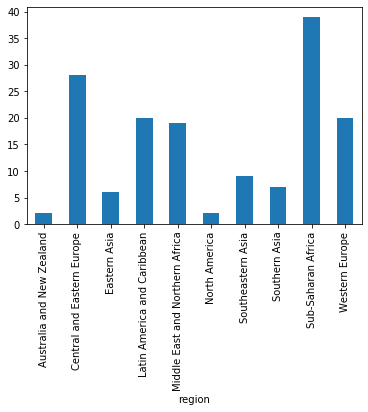

In [215]:
df_2019.groupby('region')['country'].count().plot(kind='bar')

In [218]:
df_means = df_2019.groupby('region')[features+targets].mean()

In [220]:
df_means

,gdp_pc,family,health,freedom,generosity,trust,score
region,,,,,,,
Australia and New Zealand,1.337500,1.552500,1.031000,0.571000,0.331000,0.335000,7.267500
Central and Eastern Europe,1.022429,1.340393,0.808500,0.357964,0.141214,0.062750,5.571786
Eastern Asia,1.235167,1.333500,0.953333,0.372167,0.172833,0.119667,5.688833
Latin America and Caribbean,0.908950,1.332850,0.816800,0.438500,0.142600,0.074850,5.942550
Middle East and Northern Africa,1.059053,1.148684,0.751053,0.317947,0.153474,0.105000,5.237000
North America,1.399000,1.481000,0.956500,0.519000,0.282500,0.218000,7.085000
Southeastern Asia,0.930000,1.246444,0.745333,0.543778,0.301778,0.123444,5.273667
Southern Asia,0.650286,0.986857,0.617000,0.386286,0.234714,0.093429,4.526857
Sub-Saharan Africa,0.447231,0.916103,0.407026,0.336205,0.185641,0.092641,4.294513


In [ ]:
enumerate()

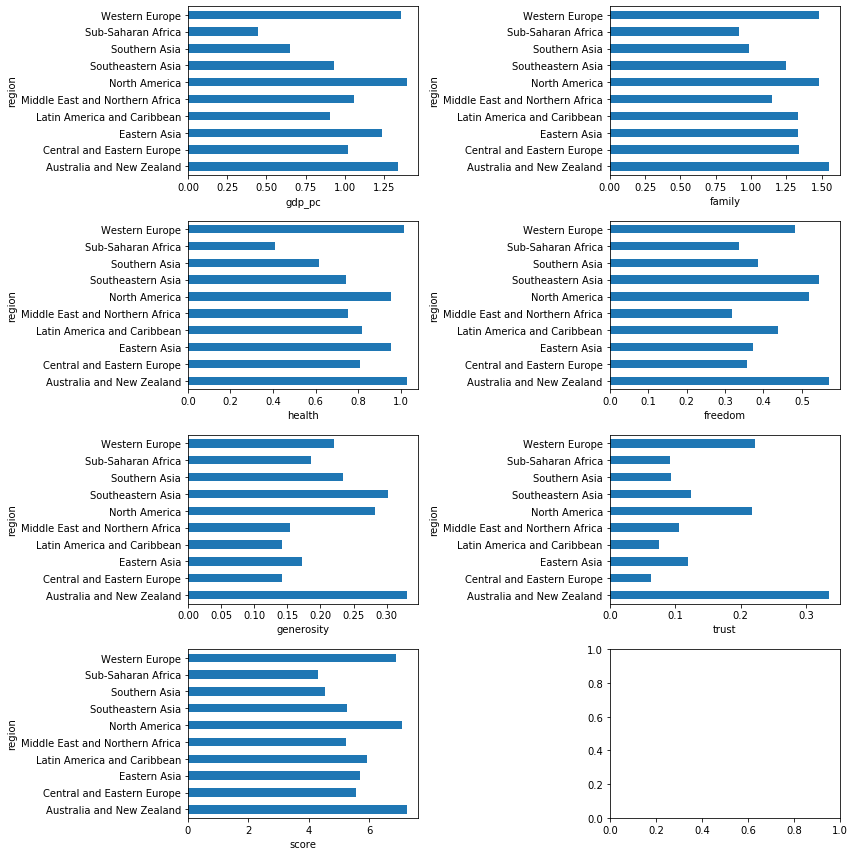

In [238]:
fig, axs = plt.subplots(4, 2, figsize=(12,12))
for i, ax in enumerate(axs.flat):
    try:
        df_means.loc[:, df_means.columns[i]].plot(kind='barh', ax=ax)
        ax.set(xlabel=df_means.columns[i])
    except:
        pass
fig.tight_layout()

[Text(0, 0, 'Southern Asia'),
 Text(0, 0, 'Central and Eastern Europe'),
 Text(0, 0, 'Middle East and Northern Africa'),
 Text(0, 0, 'Latin America and Caribbean'),
 Text(0, 0, 'Australia and New Zealand'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'Southeastern Asia'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Eastern Asia')]

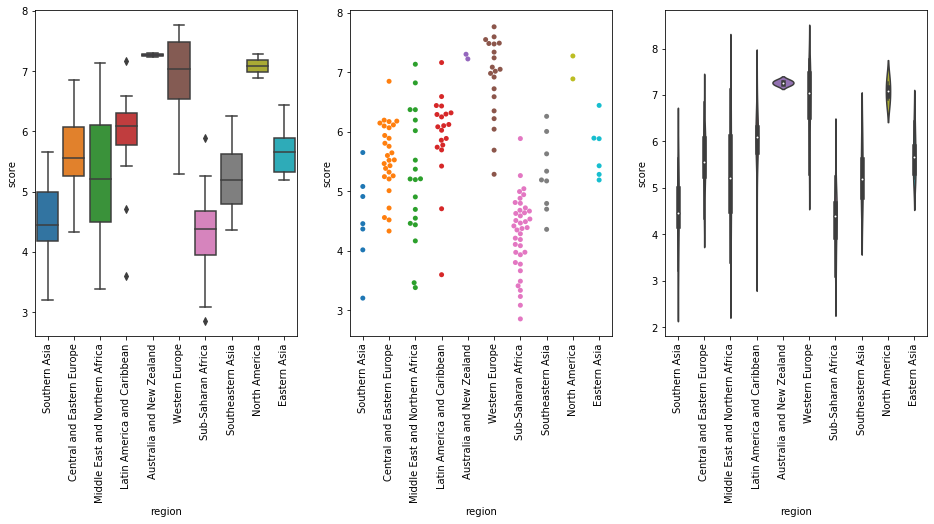

In [251]:
fig, axes = plt.subplots(1, 3, figsize=(16,6))

ax = sns.boxplot(x="region", y="score", data=df_2019, ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.swarmplot(x="region", y="score", data=df_2019, ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.violinplot(x="region", y="score", data=df_2019, ax=axes[2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

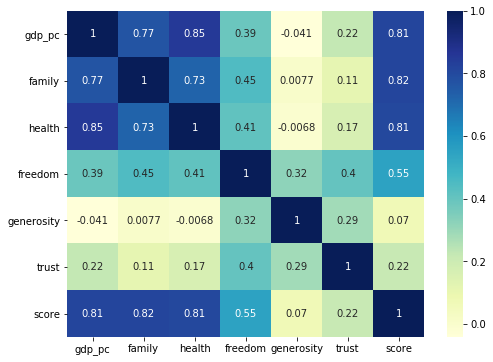

In [242]:
spearman_cormatrix= df_2019[features+targets].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_cormatrix, annot=True, cmap="YlGnBu")

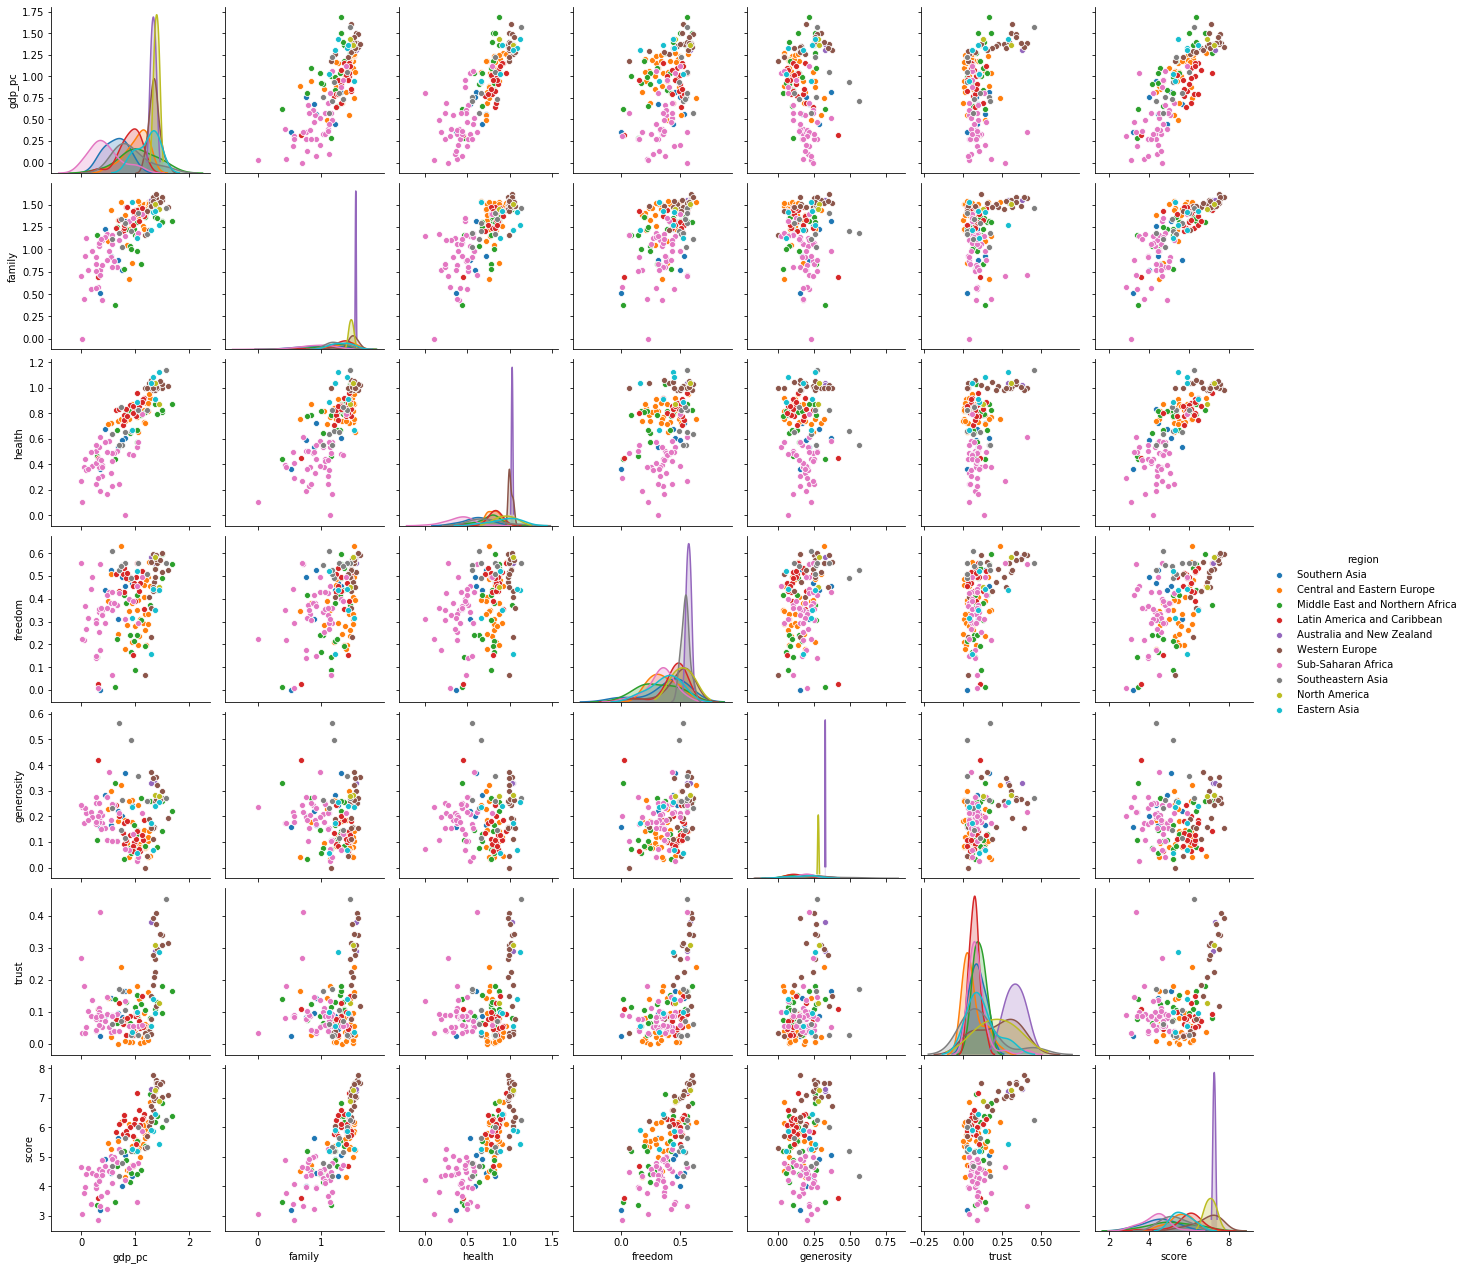

In [210]:
sns.pairplot(df_2019[features+targets+['region']], hue='region')

### Question: which countries changed the most in ranking in the past five years?

rank   -85
Name: Venezuela, dtype: int64
rank    53
Name: Benin, dtype: int64


(array([ 1.,  0.,  2.,  3., 19., 39., 64., 26., 12.,  4.]),
 array([-85. , -71.2, -57.4, -43.6, -29.8, -16. ,  -2.2,  11.6,  25.4,
         39.2,  53. ]),
 <a list of 10 Patch objects>)

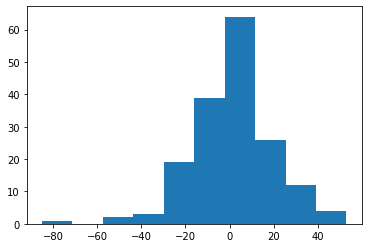

In [252]:
rank_change = pd.DataFrame(df_all_final.groupby('country')['rank'].nth(0) - df_all_final.groupby('country')['rank'].nth(-1))
print(rank_change.loc[rank_change['rank'].idxmin()])
print(rank_change.loc[rank_change['rank'].idxmax()])
plt.hist(rank_change['rank'])

score    0.0
Name: Djibouti, dtype: float64
score    2.103
Name: Venezuela, dtype: float64


(array([50., 49., 33., 13., 17.,  5.,  1.,  1.,  0.,  1.]),
 array([0.    , 0.2103, 0.4206, 0.6309, 0.8412, 1.0515, 1.2618, 1.4721,
        1.6824, 1.8927, 2.103 ]),
 <a list of 10 Patch objects>)

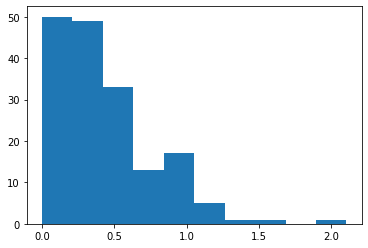

In [255]:
rank_change = pd.DataFrame(df_all_final.groupby('country')['score'].max() - df_all_final.groupby('country')['score'].min())

print(rank_change.loc[rank_change['score'].idxmin()])
print(rank_change.loc[rank_change['score'].idxmax()])

plt.hist(rank_change['score'])


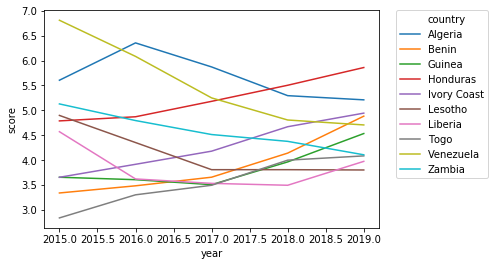

In [269]:
change_top_10 = rank_change['score'].nlargest(10).index.values
change_top_10_df = df_all_final.loc[df_all_final['country'].isin(change_top_10)]
sns.lineplot(x='year', y='score', hue='country', data=change_top_10_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)